In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'D:\Other files\projects\Water Quality\water_potability.csv')

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Beginning EDA / Data cleansing

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.fillna(data.mean(), inplace = True)

In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

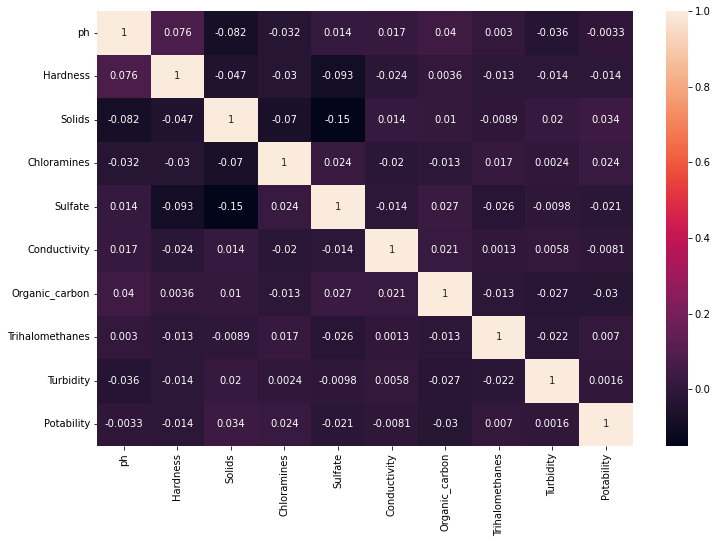

In [9]:
sns.heatmap(data.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show() #Checking Dimensionality Reduction. If value is close to 1, the values are related. Hence, we can reduce those dimensions

###Outliers checking using Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

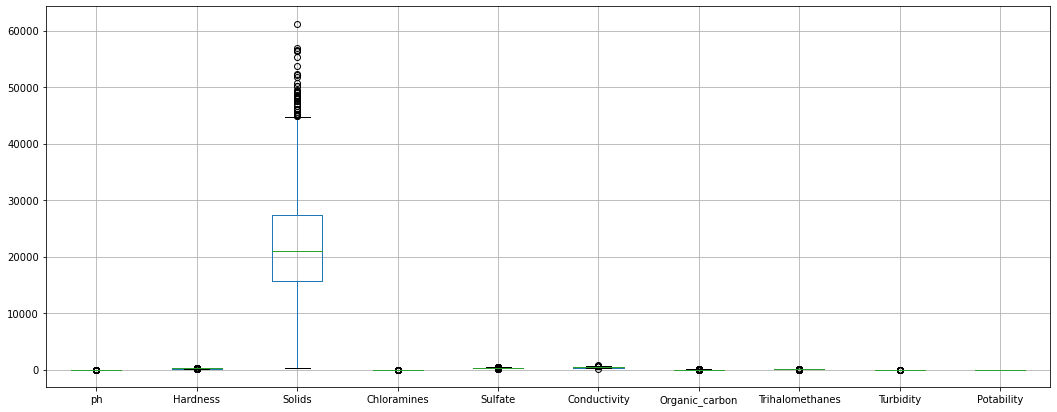

In [10]:
data.boxplot(figsize=(18,7))
plt.show

In [11]:
#this shows that solids column has outliers
data['Solids'].describe()
#but can be normal to get the outliers when we are using water dataset. Because, they might be helpful. Lots of outliers => lots of data removal



count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

C:\Users\16478\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

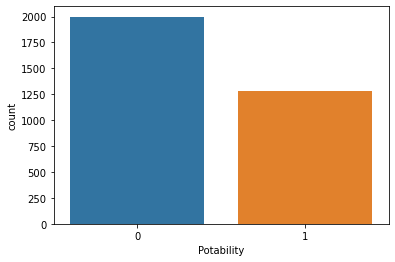

In [14]:
sns.countplot(data['Potability'])

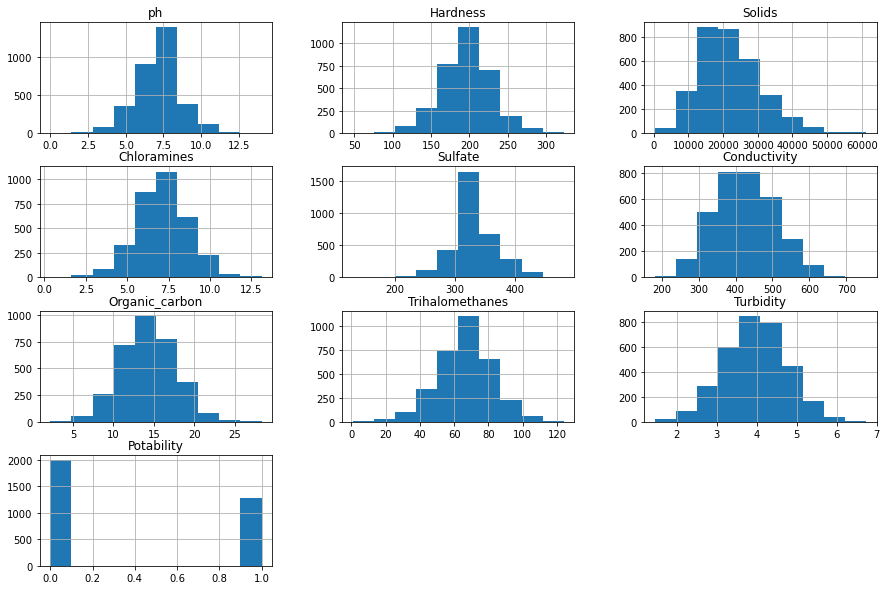

In [15]:
data.hist(figsize=(15,10))
plt.show()

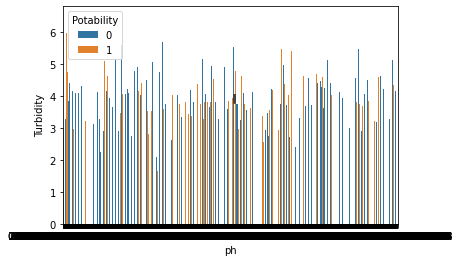

In [16]:
sns.barplot(x=data['ph'], y=data['Turbidity'], hue=data['Potability'])
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Potability'>

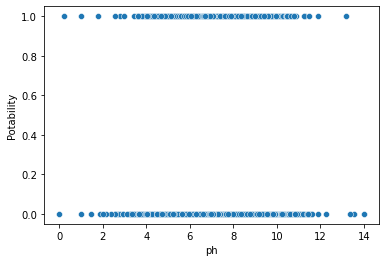

In [17]:
sns.scatterplot(x=data['ph'],y=data['Potability'])

# partitioning data as train and test

In [21]:
X = data.drop('Potability', axis = 1)
Y = data['Potability']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#30 percent for testing and 70 percent for training. No need for normalization, data seems to be normal as per graphs. Data is not skewed
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, shuffle=True, random_state = None)

# Model Training

In [18]:
#1 DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [35]:
Y_prediction = dt.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [37]:
accuracy_score(Y_prediction, Y_test)

0.595116988809766

In [38]:
#2 KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
KNN = KNeighborsClassifier()

In [43]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

In [44]:
Y_prediction_KNN = KNN.predict(X_test)

In [45]:
accuracy_score(Y_prediction_KNN, Y_test)

0.5534079348931842

In [46]:
#3 Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [50]:
Y_pred_rf = rf.predict(X_test)

In [51]:
accuracy_score(Y_pred_rf, Y_test)

0.6754832146490336